C:\Users\DELL\AppData\Local\Temp\ipykernel_22260\3979167368.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_22260\3979167368.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_22260\3979167368.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Classification Report for RF:
               precision    recall  f1-score   support

      Normal       0.67      0.94      0.78      8044
     Malware       0.33      0.06      0.10      3956

    accuracy                           0.65     12000
   macro avg       0.50      0.50      0.44     12000
weighted avg       0.56      0.65      0.56     12000

Confusion Matrix:
 [[7570  474]
 [3722  234]]


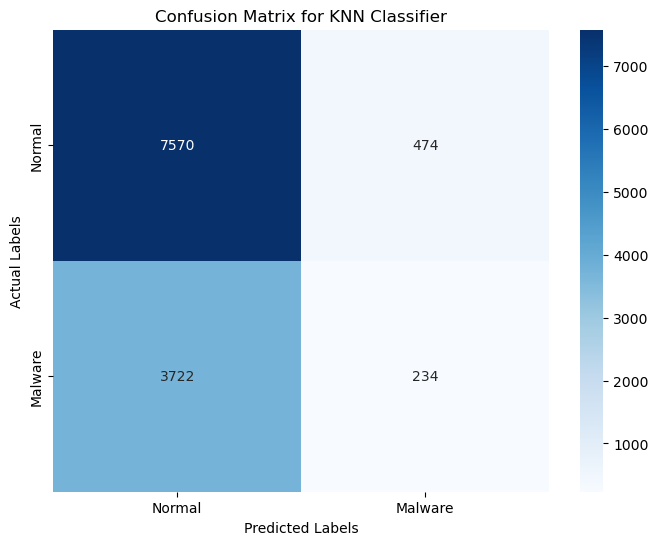

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../sample_dataset/updated_cybersecurity_attacks.csv'
data = pd.read_csv(file_path)

# Define the features and the target
features = [
    'Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 
    'Log Source', 'Geo-location Data', 'Packet Length', 'Anomaly Scores', 
    'Malware Indicators', 'Alerts/Warnings'
]
target = 'Attack Type'

# Filter the necessary columns
required_columns = features + [target]
data_filtered = data[required_columns]

# Encode categorical features
encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 
               'Log Source', 'Geo-location Data', 'Malware Indicators', 'Alerts/Warnings']:
    le = LabelEncoder()
    data_filtered[column] = le.fit_transform(data_filtered[column])
    encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
data_filtered[['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(
    data_filtered[['Packet Length', 'Anomaly Scores']]
)

# Convert target to binary classification (e.g., 'Malware' vs non-'Malware')
data_filtered['Binary Attack Type'] = (data_filtered[target] == 'Malware').astype(int)

# Prepare the feature matrix (X) and target (y)
X = data_filtered[features]
y = data_filtered['Binary Attack Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a K-Nearest Neighbors (KNN) classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Classification report
classification_report_knn = classification_report(
    y_test, y_pred, target_names=['Normal', 'Malware'], labels=[0, 1]
)

print("\nClassification Report for RF:\n", classification_report_knn)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=['Normal', 'Malware'], yticklabels=['Normal', 'Malware']
)
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15544\1386268645.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15544\1386268645.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15544\1386268645.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Classification Report for RF:
               precision    recall  f1-score   support

      Normal       0.49      0.51      0.50      5968
     Malware       0.49      0.47      0.48      6032

    accuracy                           0.49     12000
   macro avg       0.49      0.49      0.49     12000
weighted avg       0.49      0.49      0.49     12000

Confusion Matrix:
 [[3060 2908]
 [3190 2842]]


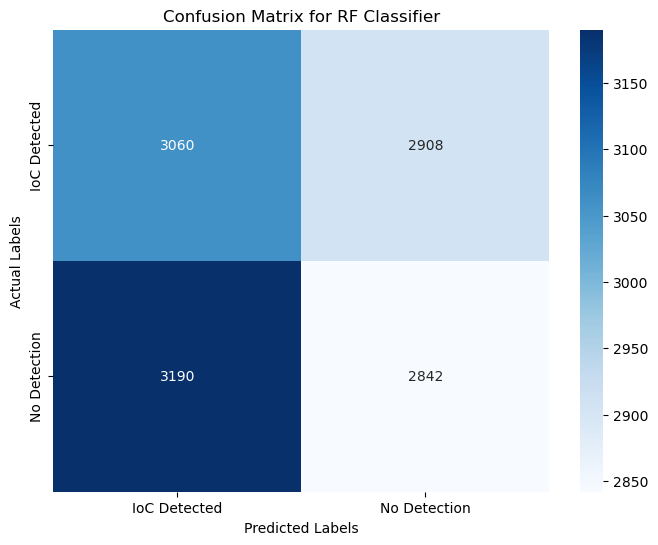

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '../sample_dataset/updated_cybersecurity_attacks.csv'

data = pd.read_csv(file_path)

features = [
    'Protocol', 'Traffic Type', 'Action Taken', 'Log Source', 'Geo-location Data', 
    'Packet Length', 'Anomaly Scores', 'Severity Level', 'Alerts/Warnings'
]
target = 'Malware Indicators'

required_columns = features + [target]
data_filtered = data[required_columns]


encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Log Source', 
               'Geo-location Data', 'Severity Level', 'Alerts/Warnings']:
    le = LabelEncoder()
    data_filtered[column] = le.fit_transform(data_filtered[column])
    encoders[column] = le


scaler = StandardScaler()
data_filtered[['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(data_filtered[['Packet Length', 'Anomaly Scores']])


# Convert the target 'Malware Indicators' to numerical encoding
encoder = LabelEncoder()
data_filtered['Malware Indicators'] = encoder.fit_transform(data_filtered[target])

X = data_filtered[features]
y = data_filtered['Malware Indicators']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Classification report
print("\nClassification Report for RF:\n", classification_report_knn)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=encoder.classes_, yticklabels=encoder.classes_
)
plt.title("Confusion Matrix for RF Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()